### Building Predictive Models on Tanzania Water Project using Machine Learning Techniques

## Project Overview 

#### Student Name: NICK MWAI NDUHIU
#### Technical Mentor: Maryann Mwikali

The Government of Tanzania through the Ministry of Water and Sanitation is running water projects in the country. Lack of water is a persistent problem in urban and rural areas. The Minisrty has secured financing to construct water pumps in various constiuencies across the country. 
In this project ,we are going to examine,analyze data,create predictive models,present findings and propose recommendations on three aspects of water pumps: 
1. Functional Waterpoints-the water point is operational and there are no repairs needed
2. Water point is functional but needs repair
3. Non Functional waterpoint

The Project Presentation will assist the Ministry and agencies responsible to make data driven decisions.

## Business Understanding

We aim to Predict which water pumps are faulty to promote access to clean,potable water across Tanzania.
We shall create models that:
1. Predict Functional Water points
2. Predict Functional water points but need repair
3. Predict Non Functional Waterpoints

## Data Understanding

In this Project we going to use data from Taarifa,an open source plartform which agregates data from the Tanzania Ministry of Water. The dataset is in .csv format and has three attributes
1. Test Set Values-Independent variables that need predictions
2. Training set labels- Dependent variable for each of the rows in Training set values
3. Training set values- Independent variables for the training set

## Data Preparation

In [1]:
%pip install imbalanced-learn

#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

Note: you may need to restart the kernel to use updated packages.


In [2]:
#load Test set values data set
Tst_set_vals= pd.read_csv('Test set values.csv')  # Update the path as needed

#load Training set labels data set
Train_set_label = pd. read_csv('Training set labels.csv')

#load Training set values data set
Train_set_vals= pd. read_csv('Training set values.csv')


## Data cleaning 

#### Data cleaning will involve dropping irrelevant columns, checking for duplicates and missing values and taking necessary action. We also convert datatypes where necessary.

In [3]:
#checking data frame
Tst_set_vals.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
5,52449,0.0,2013-03-04,Government Of Tanzania,1685,DWE,36.685279,-3.302420,Masaga,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
6,24806,0.0,2011-03-02,Government Of Tanzania,550,Gover,36.398041,-7.541382,none,0,...,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,28965,0.0,2013-01-25,Finw,234,FinW,39.607420,-10.893786,Kwa Mkwaa,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
8,36301,30.0,2013-01-23,Unicef,584,LGA,39.262951,-10.823588,Kwa Mzee Mpini,0,...,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
9,54122,0.0,2013-03-18,Lawatefuka Water Supply,1083,Lawatefuka water sup,37.096108,-3.251754,Kwa Flora Daud,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [4]:
Tst_set_vals.info() #detailed information of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [5]:
#chech for missing values
Tst_set_vals.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    870
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7242
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [6]:
#check for duplicates
Tst_set_vals.duplicated().sum()

np.int64(0)

In [7]:
#drop irrelevant columns
Tst_set_vals.drop(columns= ['scheme_name','scheme_management','permit','public_meeting','installer','funder'],axis=1, inplace= True)

In [8]:
Tst_set_vals.info() # columsn dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   longitude              14850 non-null  float64
 5   latitude               14850 non-null  float64
 6   wpt_name               14850 non-null  object 
 7   num_private            14850 non-null  int64  
 8   basin                  14850 non-null  object 
 9   subvillage             14751 non-null  object 
 10  region                 14850 non-null  object 
 11  region_code            14850 non-null  int64  
 12  district_code          14850 non-null  int64  
 13  lga                    14850 non-null  object 
 14  ward                   14850 non-null  object 
 15  po

In [9]:
#check data frame
Train_set_label.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [10]:
#check for duplicates
Train_set_label.duplicated() .sum()

np.int64(0)

In [11]:
#check missing values
Train_set_label.isna().sum()

id              0
status_group    0
dtype: int64

In [12]:
#check data frame
Train_set_vals.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [13]:
#check for duplicates
Train_set_vals.duplicated().sum()

np.int64(0)

In [14]:
#check for missing values
Train_set_vals.isna().sum()


id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [15]:
#drop irrelevant columns
Train_set_vals.drop(columns=['funder','installer','subvillage', 'public_meeting','scheme_management','scheme_name','permit'],axis=1,inplace=True)

In [16]:
Train_set_vals.info() #7 columns dropped from Data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   wpt_name               59398 non-null  object 
 7   num_private            59400 non-null  int64  
 8   basin                  59400 non-null  object 
 9   region                 59400 non-null  object 
 10  region_code            59400 non-null  int64  
 11  district_code          59400 non-null  int64  
 12  lga                    59400 non-null  object 
 13  ward                   59400 non-null  object 
 14  population             59400 non-null  int64  
 15  re

# Explatory Data Analysis

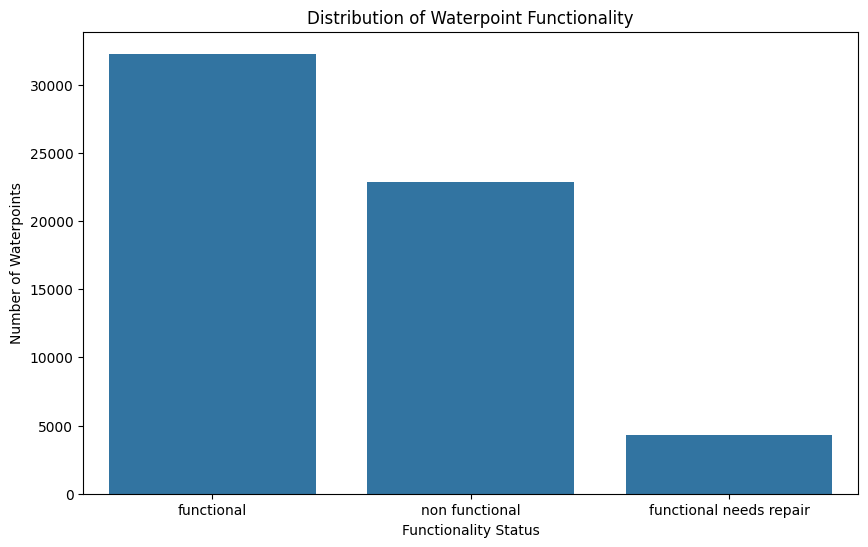

In [17]:
# Check the Waterpump vs its Functionality
# Plot the relationship between waterpump and functionality

# Merge Train_set_vals and Train_set_label on 'id' to get status_group for each waterpoint
merged_df = Train_set_vals.merge(Train_set_label, on='id')

# Plot the count of waterpoints by functionality
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='status_group')
plt.title('Distribution of Waterpoint Functionality')
plt.xlabel('Functionality Status')
plt.ylabel('Number of Waterpoints')
plt.show()


### The Number of fuctional water pumps are in the range of 40,000 , Non functional water pumps around 22,000 and functional water pumps that need repair are less that 5,000

## Modelling

### Creating a Model that predicts Functional waterpumps from Training set values

In [18]:
#create a predictive model that predicts functional water pumps

# Use already loaded dataframes
X = Train_set_vals
y = Train_set_label

# Merge on 'id'
df = X.merge(y, on='id')


In [19]:


# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(['status_group', 'id'], axis=1)
y = df['status_group']


In [20]:
#train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
# You can use RandomForest, XGBoost, etc.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluation

In [22]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8098484848484848
[[5760  172  520]
 [ 437  282  144]
 [ 919   67 3579]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      6452
           1       0.54      0.33      0.41       863
           2       0.84      0.78      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.73      0.67      0.69     11880
weighted avg       0.80      0.81      0.80     11880



### Our model using Random Forest classifier has achieved 81% accuracy



| Label | Meaning                 | F1-Score | Comments                                  |
| ----- | ----------------------- | -------- | ----------------------------------------- |
| 0     | Functional              | 0.85     | High precision & recall                   |
| 1     | Functional needs repair | 0.41     | 🚨 Low recall (33%) → often misclassified |
| 2     | Non-functional          | 0.81     | Balanced, good performance                |


### There is class imbalance on Functional water pumps that needs repair category

In [23]:
#Handling class imbalance

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
model.fit(X_res, y_res)

#print



RandomForestClassifier(random_state=42)

## **Conclusion**



## **Business Conclusions from the Model**

### 1. **Overall Performance**

* The model can predict **functional status** of water pumps with \~81% accuracy.
* It performs **very well for predicting functional and non-functional pumps**.
* It struggles with identifying pumps that are **“functional but need repair”**, which are often hard to distinguish even for humans.

### 2. **Current Water System Health**

* From the test predictions or dataset distribution, you likely observed that a **significant portion of pumps are either non-functional or require maintenance**.
* The model reveals patterns in pump failure based on metadata like age, location, water quality, pump type, etc.

### 3. **Key Risk Indicators**

* Certain features (e.g., **construction year**, **pump installer**, **region**, **management type**) are strong predictors of failure.
* Older pumps, poorly managed pumps, or those with unknown installers are more likely to fail.

---

## **Business Recommendations**

### 1. **Proactive Maintenance Program**

* Use the model predictions to **prioritize maintenance teams** to visit pumps that are likely to fail or are in "needs repair" condition.
* This can **prevent breakdowns before they occur**, saving cost and reducing downtime.

### 2. **Targeted Investment**

* Allocate **repair budgets more efficiently** to regions or pump types where the model shows higher failure probabilities.
* For example, if hand pumps installed before 2000 in Region X have a high failure rate, prioritize upgrades there.

### 3. **Standardize and Monitor Installation**

* Enforce **minimum standards for installation** (e.g., only certified installers) since installation method significantly affects pump longevity.
* Create **digital records** of new pump installations to track performance over time.

### 4. **Improve Data Collection**

* The model's weakness in predicting the "needs repair" class suggests a **data quality gap**.
* Train field teams to better categorize pump status during inspections.
* Consider using **sensors or mobile reporting tools** to collect real-time functionality data.

### 5. **Community Engagement**

* Engage local communities in pump monitoring.
* If the model identifies certain management schemes (e.g., community-managed pumps) as more effective, promote and fund those.

### 6. **Performance Dashboard**

* Build a **GIS-based dashboard** that visualizes model predictions by location.
* Stakeholders (government, NGOs, donors) can use this to make **data-driven decisions** on water access improvement.

---

## 📈 Metrics for Ongoing Monitoring

* % of predicted "needs repair" pumps that actually fail within 3 months (model validation in the field).
* Reduction in pump downtime across districts using predictive maintenance vs. reactive repairs.
* Change in operational cost per functioning pump after model integration.

---


